# Risk Management - Problem Set 03
Authors:
- Dawid Włosek
- Julia Zezula

In [7]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 01

In [8]:
population_mean = 0
population_std = 1
N = 10                   # Sample size
num_trials = 100_000     

# Simulate samples
samples = np.random.normal(loc=population_mean, scale=population_std, size=(num_trials, N))

# Calculate sample mean for each trial
sample_means = np.mean(samples, axis=1, keepdims=True)

# Calculate unbiased sample variance
sample_variances_unbiased = np.sum((samples - sample_means) ** 2, axis=1) / (N - 1)

# Compute expected value
expected_sample_variance = np.mean(sample_variances_unbiased)

# Compare
true_variance = population_std ** 2

True population variance: 1.00000
Expected value of S^2_(N-1): 1.00157
Difference: 1.56703e-03


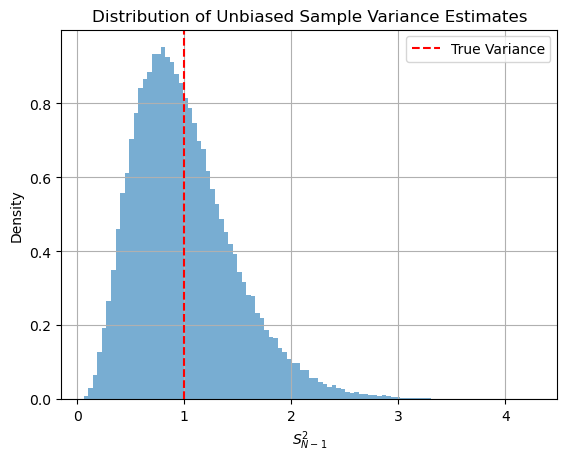

In [9]:
print(f"True population variance: {true_variance:.5f}")
print(f"Expected value of S^2_(N-1): {expected_sample_variance:.5f}")
print(f"Difference: {abs(expected_sample_variance - true_variance):.5e}")

plt.hist(sample_variances_unbiased, bins=100, density=True, alpha=0.6)
plt.axvline(true_variance, color='red', linestyle='--', label='True Variance')
plt.title("Distribution of Unbiased Sample Variance Estimates")
plt.xlabel(r"$S^2_{N-1}$")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()